In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cyberbullying_tweets.csv')

df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
df.shape

(47692, 2)

In [4]:
df.columns.tolist()

['tweet_text', 'cyberbullying_type']

In [5]:
df.isnull().sum()

,0
tweet_text,0
cyberbullying_type,0


In [6]:
df.duplicated().sum()

np.int64(36)

In [7]:
df = df.drop_duplicates()

In [8]:
df['cyberbullying_type'].value_counts()

,count
cyberbullying_type,
religion,7997
age,7992
ethnicity,7959
gender,7948
not_cyberbullying,7937
other_cyberbullying,7823


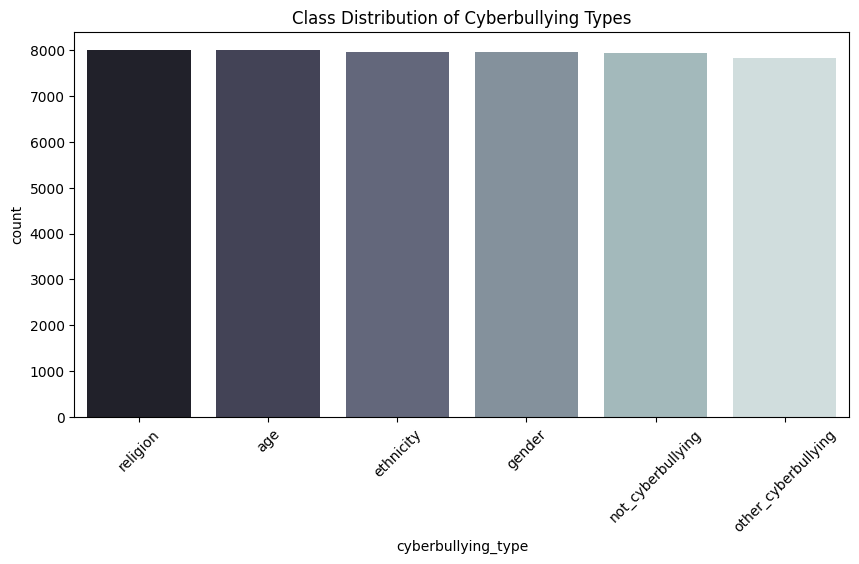

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='cyberbullying_type',
              order=df['cyberbullying_type'].value_counts().index, palette='bone')
plt.xticks(rotation=45)
plt.title("Class Distribution of Cyberbullying Types")
plt.show()

In [11]:
df['tweet_text'].sample(10, random_state=42)

,tweet_text
14204,Yup there still hot blondes #mkr
37790,"alissa violet rlly said ""it's everyday bro w t..."
5460,Ever get #bullied for being fat? Porky gets he...
18629,@FarooqSumar @NafeezAhmed @MaxBlumenthal Wrong...
13110,"RT @thetrudz: And, it is comical for Emma to m..."
20284,@ILTAFSHEHZAD Why would I care about the opini...
13275,It's so saddening that families will hide chil...
16528,"Any body saying RSS a terrorist organisation, ..."
37329,It's funny to see my 22yr old brother get bull...
40941,"#WhitePower RT @tayyoung_: FUCK OBAMA, dumb as..."


In [12]:
import re

def clean_tweet(text):
    text = text.lower()                                # lowercase
    text = re.sub(r'http\S+|www\S+', '', text)         # remove urls
    text = re.sub(r'@\w+', '', text)                   # remove mentions
    text = re.sub(r'#(\w+)', r'\1', text)              # remove '#' but keep the word
    text = re.sub(r'[^a-z\s]', '', text)               # keep only letters & spaces
    text = re.sub(r'\s+', ' ', text).strip()           # remove extra spaces
    return text

df['clean_text'] = df['tweet_text'].apply(clean_tweet)

In [13]:
# show before vs after for a few samples
for i in range(5):
    print("Original :", df['tweet_text'].iloc[i])
    print("Cleaned  :", df['clean_text'].iloc[i])
    print("\n")

Original : In other words #katandandre, your food was crapilicious! #mkr
Cleaned  : in other words katandandre your food was crapilicious mkr


Original : Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc
Cleaned  : why is aussietv so white mkr theblock imacelebrityau today sunrise studio neighbours wonderlandten etc


Original : @XochitlSuckkks a classy whore? Or more red velvet cupcakes?
Cleaned  : a classy whore or more red velvet cupcakes


Original : @Jason_Gio meh. :P  thanks for the heads up, but not too concerned about another angry dude on twitter.
Cleaned  : meh p thanks for the heads up but not too concerned about another angry dude on twitter


Original : @RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.
Cleaned  : this is an isis account pretending to be a kurdish account like islam it is all lies




In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = text.split()  # simple split by space
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df['tokens'] = df['clean_text'].apply(tokenize_and_remove_stopwords)

In [15]:
for i in range(5):
    print("Cleaned :", df['clean_text'].iloc[i])
    print("Tokens  :", df['tokens'].iloc[i])
    print("\n")

Cleaned : in other words katandandre your food was crapilicious mkr
Tokens  : ['words', 'katandandre', 'food', 'crapilicious', 'mkr']


Cleaned : why is aussietv so white mkr theblock imacelebrityau today sunrise studio neighbours wonderlandten etc
Tokens  : ['aussietv', 'white', 'mkr', 'theblock', 'imacelebrityau', 'today', 'sunrise', 'studio', 'neighbours', 'wonderlandten', 'etc']


Cleaned : a classy whore or more red velvet cupcakes
Tokens  : ['classy', 'whore', 'red', 'velvet', 'cupcakes']


Cleaned : meh p thanks for the heads up but not too concerned about another angry dude on twitter
Tokens  : ['meh', 'p', 'thanks', 'heads', 'concerned', 'another', 'angry', 'dude', 'twitter']


Cleaned : this is an isis account pretending to be a kurdish account like islam it is all lies
Tokens  : ['isis', 'account', 'pretending', 'kurdish', 'account', 'like', 'islam', 'lies']




In [16]:
df['final_text'] = df['tokens'].apply(lambda x: ' '.join(x))
df['final_text'].head()

,final_text
0,words katandandre food crapilicious mkr
1,aussietv white mkr theblock imacelebrityau tod...
2,classy whore red velvet cupcakes
3,meh p thanks heads concerned another angry dud...
4,isis account pretending kurdish account like i...


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

X = df['final_text']
y = df['cyberbullying_type']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print("Train size:", X_train.shape[0])
print("Test size :", X_test.shape[0])
print("Classes:", le.classes_)  # shows original labels order

Train size: 38124
Test size : 9532
Classes: ['age' 'ethnicity' 'gender' 'not_cyberbullying' 'other_cyberbullying'
 'religion']


In [18]:
# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape :", X_test_tfidf.shape)

TF-IDF train shape: (38124, 5000)
TF-IDF test shape : (9532, 5000)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=200, solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Linear SVC": LinearSVC(random_state=42, max_iter=2000)
}

# Train + Evaluate
for name, clf in models.items():
    print(f"\n{name}")
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))


Logistic Regression
Accuracy: 0.8244859420898027
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1598
           1       0.97      0.97      0.97      1592
           2       0.92      0.81      0.86      1590
           3       0.62      0.50      0.56      1587
           4       0.57      0.73      0.64      1565
           5       0.95      0.95      0.95      1600

    accuracy                           0.82      9532
   macro avg       0.83      0.82      0.82      9532
weighted avg       0.83      0.82      0.82      9532


Random Forest
Accuracy: 0.8150440621065883
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1598
           1       0.98      0.97      0.98      1592
           2       0.91      0.83      0.86      1590
           3       0.57      0.49      0.53      1587
           4       0.53      0.67      0.59      1565
           5       0.96      0.95     

In [20]:
# Check Training vs Test Accuracy
for name, clf in models.items():
    train_acc = accuracy_score(y_train, clf.predict(X_train_tfidf))
    test_acc  = accuracy_score(y_test, clf.predict(X_test_tfidf))

    print(f"\n{name}")
    print("Training Accuracy:", train_acc)
    print("Test Accuracy    :", test_acc)


Logistic Regression
Training Accuracy: 0.8674850487881649
Test Accuracy    : 0.8244859420898027

Random Forest
Training Accuracy: 0.9618088343300808
Test Accuracy    : 0.8150440621065883

Linear SVC
Training Accuracy: 0.898384219913965
Test Accuracy    : 0.819555182543013


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test_pred = models['Logistic Regression'].predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (raw counts):\n", cm)

Confusion Matrix (raw counts):
 [[1562    3    2   11   18    2]
 [   2 1543    6    6   32    3]
 [   7   10 1293  124  151    5]
 [  60   16   47  800  620   44]
 [  14   19   54  310 1146   22]
 [   3    1    8   37   36 1515]]


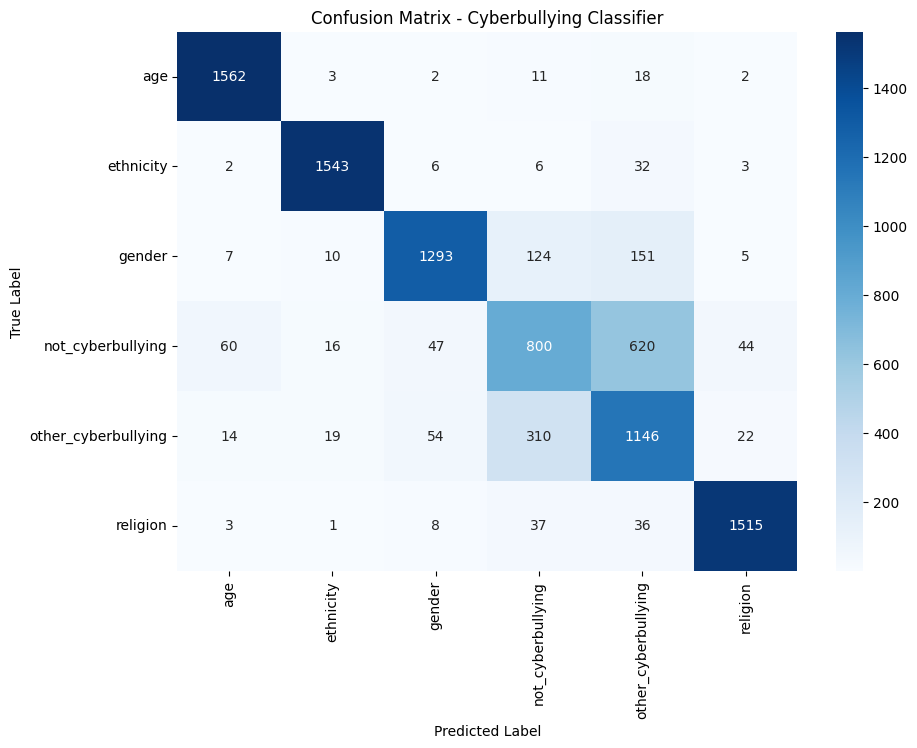

In [46]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Cyberbullying Classifier")
plt.show()

In [35]:
def predict_cyberbullying(text, model, vectorizer, label_encoder):
    """
    Predict the cyberbullying type for a given text.
    """
    import re
    from nltk.corpus import stopwords

    # Clean text
    text = text.lower()
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'#(\w+)', r'\1', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Stopwords
    tokens = text.split()
    stop_words = set(stopwords.words("english"))
    tokens = [w for w in tokens if w not in stop_words]

    final_text = " ".join(tokens)

    # Vectorize
    X_vec = vectorizer.transform([final_text])

    # Predict numeric class
    pred_num = model.predict(X_vec)[0]

    # Convert back to label name
    pred_label = label_encoder.inverse_transform([pred_num])[0]

    return pred_label

In [37]:
best_model = models["Logistic Regression"]

In [48]:
print(predict_cyberbullying("Christians think they are better than everyone.", best_model, tfidf, le))
print(predict_cyberbullying("Your Hindu gods are fake.", best_model, tfidf, le))
print('\n')
print(predict_cyberbullying("Women should stay in the kitchen.", best_model, tfidf, le))
print(predict_cyberbullying("No man would ever want you.", best_model, tfidf, le))
print('\n')
print(predict_cyberbullying("Mexicans are all lazy.", best_model, tfidf, le))
print(predict_cyberbullying("Black people are dangerous.", best_model, tfidf, le))
print('\n')
print(predict_cyberbullying("You’re too old for this app.", best_model, tfidf, le))
print(predict_cyberbullying("Shut up, you’re just a kid.", best_model, tfidf, le))
print('\n')
print(predict_cyberbullying("You’re such a loser.", best_model, tfidf, le))
print(predict_cyberbullying("Nobody likes you.", best_model, tfidf, le))
print('\n')
print(predict_cyberbullying("I love pizza.", best_model, tfidf, le))
print(predict_cyberbullying("Have a great day!", best_model, tfidf, le))

religion
religion


not_cyberbullying
gender


not_cyberbullying
ethnicity


other_cyberbullying
other_cyberbullying


other_cyberbullying
other_cyberbullying


not_cyberbullying
not_cyberbullying


In [47]:
import joblib

# save separately
joblib.dump(best_model, "cyberbullying_lr_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")
print("Saved: cyberbullying_lr_model.pkl, tfidf_vectorizer.pkl, label_encoder.pkl")

Saved: cyberbullying_lr_model.pkl, tfidf_vectorizer.pkl, label_encoder.pkl
